# S&P 500 Stocks

In [20]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [21]:
# Download latest version
path1 = kagglehub.dataset_download("andrewmvd/sp-500-stocks")
print("Path to dataset files:", path1)

Path to dataset files: /kaggle/input/sp-500-stocks


In [22]:
# Show list of files in the downloaded dataset folder
print("Files in dataset directory:")
print(os.listdir(path1))

Files in dataset directory:
['sp500_stocks.csv', 'sp500_companies.csv', 'sp500_index.csv']


There are three diffrent files - one for stock prices, one for name and company info and the last file is about SP500 indexes. Join the stock price data to the company info data.

In [23]:
# Load each file
stocks_df = pd.read_csv(os.path.join(path1, 'sp500_stocks.csv'))
companies_df = pd.read_csv(os.path.join(path1, 'sp500_companies.csv'))
index_df = pd.read_csv(os.path.join(path1, 'sp500_index.csv'))

In [24]:
# Laoding SP500 Stocks
dfsp_stocks = pd.read_csv(os.path.join(path1, 'sp500_stocks.csv'))
print(dfsp_stocks.head())

         Date Symbol  Adj Close  Close  High  Low  Open  Volume
0  2010-01-04    MMM        NaN    NaN   NaN  NaN   NaN     NaN
1  2010-01-05    MMM        NaN    NaN   NaN  NaN   NaN     NaN
2  2010-01-06    MMM        NaN    NaN   NaN  NaN   NaN     NaN
3  2010-01-07    MMM        NaN    NaN   NaN  NaN   NaN     NaN
4  2010-01-08    MMM        NaN    NaN   NaN  NaN   NaN     NaN


There seems to be a lot of missing data for prices and volumes.

In [25]:
# Laoding SP500 Companies
dfsp_comp = pd.read_csv(os.path.join(path1, 'sp500_companies.csv'))

In [26]:
# Rename datset 500
dfSnP5000 = dfsp_comp

In [27]:
# Laoding SP500 Index
dfsp_index = pd.read_csv(os.path.join(path1, 'sp500_index.csv'))
print(dfsp_index.head())

         Date   S&P500
0  2014-12-22  2078.54
1  2014-12-23  2082.17
2  2014-12-24  2081.88
3  2014-12-26  2088.77
4  2014-12-29  2090.57


In [28]:
dfSnP5000

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,NMS,CZR,"Caesars Entertainment, Inc.","Caesars Entertainment, Inc.",Consumer Cyclical,Resorts & Casinos,32.82,6973593600,3.668000e+09,-0.040,Reno,NV,United States,51000.0,"Caesars Entertainment, Inc. operates as a gami...",0.000125
498,NYQ,BWA,BorgWarner Inc.,BorgWarner Inc.,Consumer Cyclical,Auto Parts,31.88,6972155904,1.882000e+09,-0.048,Auburn Hills,MI,United States,39900.0,"BorgWarner Inc., together with its subsidiarie...",0.000125
499,NMS,QRVO,"Qorvo, Inc.","Qorvo, Inc.",Technology,Semiconductors,70.85,6697217024,6.731300e+08,-0.052,Greensboro,NC,United States,8700.0,"Qorvo, Inc. engages in development and commerc...",0.000120
500,NYQ,FMC,FMC Corporation,FMC Corporation,Basic Materials,Agricultural Inputs,50.15,6260525568,7.033000e+08,0.085,Philadelphia,PA,United States,5800.0,"FMC Corporation, an agricultural sciences comp...",0.000113


In [29]:
dfsp_index

,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57
...,...,...
2512,2024-12-16,6074.08
2513,2024-12-17,6050.61
2514,2024-12-18,5872.16
2515,2024-12-19,5867.08


## Join SP 500 companies with their stock prices

In [30]:
# Merge stock data with company info on ticker symbol
df_SP500 = dfsp_stocks.merge(dfsp_comp, on='Symbol', how='left')
df_SP500

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,3M Company,...,129.28,70400581632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001267
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,3M Company,...,129.28,70400581632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001267
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,3M Company,...,129.28,70400581632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001267
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,3M Company,...,129.28,70400581632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001267
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,3M Company,...,129.28,70400581632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891531,2024-12-16,ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,Zoetis Inc.,...,164.84,74370031616,3.764000e+09,0.110,Parsippany,NJ,United States,14100.0,"Zoetis Inc. engages in the discovery, developm...",0.001338
1891532,2024-12-17,ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,Zoetis Inc.,...,164.84,74370031616,3.764000e+09,0.110,Parsippany,NJ,United States,14100.0,"Zoetis Inc. engages in the discovery, developm...",0.001338
1891533,2024-12-18,ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,Zoetis Inc.,...,164.84,74370031616,3.764000e+09,0.110,Parsippany,NJ,United States,14100.0,"Zoetis Inc. engages in the discovery, developm...",0.001338
1891534,2024-12-19,ZTS,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,Zoetis Inc.,...,164.84,74370031616,3.764000e+09,0.110,Parsippany,NJ,United States,14100.0,"Zoetis Inc. engages in the discovery, developm...",0.001338


In [31]:
print(df_SP500.isna().sum().sum())

7872078


## Duplicate Data

In [32]:
print(df_SP500.duplicated().sum())

0


Both datasets have exacly the same percentage of NaN values

## Find Max and Min dates

In [33]:
print(df_SP500['Date'].min(), df_SP500['Date'].max())

2010-01-04 2024-12-20


They both have the same exact beginning and end dates

In [34]:
!pip install tensorflow

## Make copy of the orinigal data and sort by date

In [35]:
dfSnP5000_ = df_SP500[df_SP500['Symbol'] == 'AAPL'].copy()
df_SP500['Date'] = pd.to_datetime(df_SP500['Date'])
df_SP500 = df_SP500.sort_values('Date')

In [36]:
df_SP500

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,3M Company,...,129.28,70400581632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001267
1729512,2010-01-04,ULTA,NaN,NaN,NaN,NaN,NaN,NaN,NMS,"Ulta Beauty, Inc.",...,430.01,19940638720,1.827608e+09,0.009,Bolingbrook,IL,United States,20000.0,"Ulta Beauty, Inc. operates as a specialty beau...",0.000359
1051272,2010-01-04,KHC,NaN,NaN,NaN,NaN,NaN,NaN,NMS,The Kraft Heinz Company,...,30.52,36903870464,6.446000e+09,-0.028,Pittsburgh,PA,United States,36000.0,"The Kraft Heinz Company, together with its sub...",0.000664
1047504,2010-01-04,KLAC,NaN,NaN,NaN,NaN,NaN,NaN,NMS,KLA Corporation,...,629.37,84184530944,4.249193e+09,0.185,Milpitas,CA,United States,15000.0,"KLA Corporation, together with its subsidiarie...",0.001515
1043736,2010-01-04,KKR,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,KKR & Co. Inc.,...,147.58,136186535936,NaN,0.238,New York,NY,United States,4490.0,KKR & Co. Inc. is a private equity and real es...,0.002450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284887,2024-12-20,NDSN,NaN,NaN,NaN,NaN,NaN,NaN,NMS,Nordson Corporation,...,209.73,11957965824,8.187840e+08,0.020,Westlake,OH,United States,7700.0,"Nordson Corporation engineers, manufactures, a...",0.000215
1288655,2024-12-20,NSC,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,Norfolk Southern Corporation,...,234.15,52974096384,5.888000e+09,0.027,Atlanta,GA,United States,20700.0,"Norfolk Southern Corporation, together with it...",0.000953
1292423,2024-12-20,NTRS,NaN,NaN,NaN,NaN,NaN,NaN,NMS,Northern Trust Corporation,...,102.48,20313380864,NaN,0.145,Chicago,IL,United States,23300.0,"Northern Trust Corporation, a financial holdin...",0.000365
1243439,2024-12-20,MSI,469.940002,469.940002,472.570007,460.0,461.029999,2508300.0,NYQ,"Motorola Solutions, Inc.",...,469.94,78536843264,3.152000e+09,0.092,Chicago,IL,United States,21000.0,"Motorola Solutions, Inc. provides public safet...",0.001413


Notes:
* What is next closing price: individual stock goes up or down



* Predicting returns:

use cases: clustering, multi classification, clustering, abnormally detection.

## EDA

### Missing data

In [37]:
df_SP500.isnull().sum()

,0
Date,0
Symbol,0
Adj Close,1273705
Close,1273705
High,1273705
Low,1273705
Open,1273705
Volume,1273705
Exchange,0
Shortname,0


In [38]:
missing_percent = df_SP500.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)

,0
Adj Close,67.337074
Close,67.337074
High,67.337074
Low,67.337074
Open,67.337074
Volume,67.337074
Ebitda,5.776892
State,3.984064
Fulltimeemployees,1.792829
Revenuegrowth,0.597610


In [39]:
df_SP500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1891536 entries, 0 to 1891535
Data columns (total 23 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Date                 datetime64[ns]
 1   Symbol               object        
 2   Adj Close            float64       
 3   Close                float64       
 4   High                 float64       
 5   Low                  float64       
 6   Open                 float64       
 7   Volume               float64       
 8   Exchange             object        
 9   Shortname            object        
 10  Longname             object        
 11  Sector               object        
 12  Industry             object        
 13  Currentprice         float64       
 14  Marketcap            int64         
 15  Ebitda               float64       
 16  Revenuegrowth        float64       
 17  City                 object        
 18  State                object        
 19  Country              objec

In [40]:
df_SP500.describe(include='all')

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
count,1891536,1891536,617831.000000,617831.000000,617831.000000,617831.000000,617831.000000,6.178310e+05,1891536,1891536,...,1.891536e+06,1.891536e+06,1.782264e+06,1.880232e+06,1891536,1816176,1891536,1.857624e+06,1891536,1.891536e+06
unique,NaN,502,NaN,NaN,NaN,NaN,NaN,NaN,4,499,...,NaN,NaN,NaN,NaN,235,41,8,NaN,499,NaN
top,NaN,SPG,NaN,NaN,NaN,NaN,NaN,NaN,NYQ,News Corporation,...,NaN,NaN,NaN,NaN,New York,CA,United States,NaN,"News Corporation, a media and information serv...",NaN
freq,NaN,3768,NaN,NaN,NaN,NaN,NaN,NaN,1311264,7536,...,NaN,NaN,NaN,NaN,143184,252456,1812408,NaN,7536,NaN
mean,2017-06-27 13:11:27.898089472,NaN,79.672357,87.471540,88.417844,86.480997,87.460302,9.347125e+06,NaN,NaN,...,2.178937e+02,1.107222e+11,7.045286e+09,7.054108e-02,NaN,NaN,NaN,5.782761e+04,NaN,1.992032e-03
min,2010-01-04 00:00:00,NaN,0.203593,0.222000,0.226250,0.216250,0.218000,0.000000e+00,NaN,NaN,...,9.400000e+00,4.664099e+09,-3.991000e+09,-6.020000e-01,NaN,NaN,NaN,2.800000e+01,NaN,8.391304e-05
25%,2013-09-30 18:00:00,NaN,26.572459,32.700001,33.060001,32.299999,32.689999,1.144000e+06,NaN,NaN,...,6.849000e+01,1.932243e+10,1.625000e+09,2.000000e-03,NaN,NaN,NaN,1.020000e+04,NaN,3.476350e-04
50%,2017-06-27 12:00:00,NaN,49.821613,59.139999,59.720001,58.500000,59.119999,2.453400e+06,NaN,NaN,...,1.183650e+02,3.706396e+10,2.952748e+09,5.100000e-02,NaN,NaN,NaN,2.169000e+04,NaN,6.668275e-04
75%,2021-03-25 06:00:00,NaN,94.831036,105.019997,106.129997,103.889999,105.000000,5.657850e+06,NaN,NaN,...,2.276800e+02,7.853684e+10,6.020000e+09,1.090000e-01,NaN,NaN,NaN,5.510000e+04,NaN,1.412977e-03
max,2024-12-20 00:00:00,NaN,1702.530029,1702.530029,1714.750000,1696.900024,1706.400024,3.692928e+09,NaN,NaN,...,8.276780e+03,3.846820e+12,1.495470e+11,1.632000e+00,NaN,NaN,NaN,2.100000e+06,NaN,6.920915e-02


In [41]:
df_SP500['Close'].fillna(df_SP500['Close'].median(), inplace=True)
df_SP500['Volume'].fillna(df_SP500['Volume'].mean(), inplace=True)

<ipython-input-41-06e2b8971544>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_SP500['Close'].fillna(df_SP500['Close'].median(), inplace=True)
<ipython-input-41-06e2b8971544>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [42]:
df_SP500['Sector'].fillna(df_SP500['Sector'].mode()[0], inplace=True)

<ipython-input-42-1dbc8520d6f6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_SP500['Sector'].fillna(df_SP500['Sector'].mode()[0], inplace=True)


In [43]:
df_SP500['Longbusinesssummary'].fillna('No description available', inplace=True)

<ipython-input-43-7e6a85ce407d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_SP500['Longbusinesssummary'].fillna('No description available', inplace=True)


In [44]:
# Understand what stocks have missing values:
missing_rows = df_SP500[df_SP500.isnull().any(axis=1)]
missing_rows

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,2010-01-04,MMM,NaN,59.139999,NaN,NaN,NaN,9.347125e+06,NYQ,3M Company,...,129.28,70400581632,8.117000e+09,0.004,Saint Paul,MN,United States,85000.0,3M Company provides diversified technology ser...,0.001267
1729512,2010-01-04,ULTA,NaN,59.139999,NaN,NaN,NaN,9.347125e+06,NMS,"Ulta Beauty, Inc.",...,430.01,19940638720,1.827608e+09,0.009,Bolingbrook,IL,United States,20000.0,"Ulta Beauty, Inc. operates as a specialty beau...",0.000359
1051272,2010-01-04,KHC,NaN,59.139999,NaN,NaN,NaN,9.347125e+06,NMS,The Kraft Heinz Company,...,30.52,36903870464,6.446000e+09,-0.028,Pittsburgh,PA,United States,36000.0,"The Kraft Heinz Company, together with its sub...",0.000664
1047504,2010-01-04,KLAC,NaN,59.139999,NaN,NaN,NaN,9.347125e+06,NMS,KLA Corporation,...,629.37,84184530944,4.249193e+09,0.185,Milpitas,CA,United States,15000.0,"KLA Corporation, together with its subsidiarie...",0.001515
1043736,2010-01-04,KKR,NaN,59.139999,NaN,NaN,NaN,9.347125e+06,NYQ,KKR & Co. Inc.,...,147.58,136186535936,NaN,0.238,New York,NY,United States,4490.0,KKR & Co. Inc. is a private equity and real es...,0.002450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281119,2024-12-20,NI,NaN,59.139999,NaN,NaN,NaN,9.347125e+06,NYQ,NiSource Inc,...,36.17,16883395584,2.325000e+09,0.048,Merrillville,IN,United States,7364.0,"NiSource Inc., an energy holding company, oper...",0.000304
1284887,2024-12-20,NDSN,NaN,59.139999,NaN,NaN,NaN,9.347125e+06,NMS,Nordson Corporation,...,209.73,11957965824,8.187840e+08,0.020,Westlake,OH,United States,7700.0,"Nordson Corporation engineers, manufactures, a...",0.000215
1288655,2024-12-20,NSC,NaN,59.139999,NaN,NaN,NaN,9.347125e+06,NYQ,Norfolk Southern Corporation,...,234.15,52974096384,5.888000e+09,0.027,Atlanta,GA,United States,20700.0,"Norfolk Southern Corporation, together with it...",0.000953
1292423,2024-12-20,NTRS,NaN,59.139999,NaN,NaN,NaN,9.347125e+06,NMS,Northern Trust Corporation,...,102.48,20313380864,NaN,0.145,Chicago,IL,United States,23300.0,"Northern Trust Corporation, a financial holdin...",0.000365


In [45]:
missing_by_symbol = missing_rows['Symbol'].value_counts()
print(missing_by_symbol.head(10))  # Top 10 most affected stocks

Symbol
SPG     3768
MMM     3768
ULTA    3768
NOW     3768
TMUS    3768
SJM     3768
TPR     3768
STE     3768
STT     3768
SMCI    3768
Name: count, dtype: int64


In [46]:
# Columns with missing data
df_SP500[df_SP500['Symbol'] == 'AAPL'].isnull().sum()

,0
Date,0
Symbol,0
Adj Close,3768
Close,0
High,3768
Low,3768
Open,3768
Volume,0
Exchange,0
Shortname,0


In [47]:
# Group stocks with high percentage of missing data:
missing_pct_by_stock = df_SP500.groupby('Symbol').apply(lambda x: x.isnull().mean() * 100)

<ipython-input-47-f94909d6049b>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_pct_by_stock = df_SP500.groupby('Symbol').apply(lambda x: x.isnull().mean() * 100)


In [48]:
missing_pct_by_stock

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
Symbol,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,100.000000,0.0,100.000000,100.000000,100.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAPL,0.0,0.0,100.000000,0.0,100.000000,100.000000,100.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABBV,0.0,0.0,20.010616,0.0,20.010616,20.010616,20.010616,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABNB,0.0,0.0,100.000000,0.0,100.000000,100.000000,100.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABT,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,0.0,0.0,11.916136,0.0,11.916136,11.916136,11.916136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YUM,0.0,0.0,100.000000,0.0,100.000000,100.000000,100.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZBH,0.0,0.0,100.000000,0.0,100.000000,100.000000,100.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Find stocks with >50% missing values
stocks_to_remove = missing_pct_by_stock[missing_pct_by_stock['Adj Close'] > 50].index.tolist()

In [50]:
# Filter them out from main DataFrame
df_SP500_cleaned = df_SP500[~df_SP500['Symbol'].isin(stocks_to_remove)]

In [51]:
df_SP500_cleaned

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
1036200,2010-01-04,KIM,6.903805,13.660000,13.880000,13.560000,13.620000,6263800.0,NYQ,Kimco Realty Corporation (HC),...,23.42,15786977280,1.195842e+09,0.138,Jericho,NY,United States,660.0,Kimco Realty (NYSE: KIM) is a real estate inve...,0.000284
1013592,2010-01-04,K,30.363018,49.605633,50.300468,49.361504,50.056339,2927685.0,NYQ,Kellanova,...,80.50,27748188160,2.032000e+09,-0.007,Chicago,IL,United States,23000.0,"Kellanova, together with its subsidiaries, man...",0.000499
1737048,2010-01-04,UAL,12.800000,12.800000,13.110000,12.530000,12.990000,8785900.0,NMS,"United Airlines Holdings, Inc.",...,97.40,32032522240,7.483000e+09,0.025,Chicago,IL,United States,106500.0,"United Airlines Holdings, Inc., through its su...",0.000576
1002288,2010-01-04,JCI,12.019053,18.879391,19.025137,18.665976,18.728437,8334301.0,NYQ,Johnson Controls International,...,80.64,53398601728,3.232000e+09,-0.095,Cork,NaN,Ireland,100000.0,"Johnson Controls International plc, together w...",0.000961
983448,2010-01-04,JBHT,28.517717,33.060001,33.110001,32.240002,32.560001,1876000.0,NMS,"J.B. Hunt Transport Services, I",...,170.23,17164290048,1.577557e+09,-0.030,Lowell,AR,United States,34718.0,"J.B. Hunt Transport Services, Inc. provides su...",0.000309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183151,2024-12-20,MTD,1230.739990,1230.739990,1240.660034,1197.119995,1206.069946,275200.0,NYQ,"Mettler-Toledo International, I",...,1230.74,25971937280,1.142445e+09,0.013,Columbus,OH,United States,16000.0,Mettler-Toledo International Inc. manufactures...,0.000467
1250975,2024-12-20,NDAQ,77.699997,77.699997,78.580002,77.089996,77.379997,7180800.0,NMS,"Nasdaq, Inc.",...,77.70,44658696192,2.512000e+09,0.311,New York,NY,United States,9120.0,"Nasdaq, Inc. operates as a technology company ...",0.000803
1254743,2024-12-20,NTAP,118.449997,118.449997,119.820000,115.099998,115.940002,3813600.0,NMS,"NetApp, Inc.",...,118.45,24081594368,1.582000e+09,0.076,San Jose,CA,United States,11800.0,"NetApp, Inc. provides a range of enterprise so...",0.000433
1258511,2024-12-20,NFLX,909.049988,909.049988,919.919983,890.489990,893.210022,4517100.0,NMS,"Netflix, Inc.",...,909.05,388580671488,9.976899e+09,0.150,Los Gatos,CA,United States,13000.0,"Netflix, Inc. provides entertainment services....",0.006991


In [52]:
!pip install tensorflow

In [53]:
symbol = "NFLX"
df_SP500_cleaned = df_SP500_cleaned[df_SP500_cleaned['Symbol'] == symbol].sort_values('Date')
df_SP500_cleaned = df_SP500_cleaned[['Date', 'Close']].dropna()
df_SP500_cleaned['Date'] = pd.to_datetime(df_SP500_cleaned['Date'])
df_SP500_cleaned.set_index('Date', inplace=True)

In [54]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_SP500_cleaned[['Close']])

In [55]:
# Filter them out from main DataFrame
df_SP500_cleaned = df_SP500[~df_SP500['Symbol'].isin(stocks_to_remove)].copy()

symbol = "NFLX"
# Now, filter the cleaned DataFrame for the specific symbol
df_symbol_cleaned = df_SP500_cleaned[df_SP500_cleaned['Symbol'] == symbol].sort_values('Date')

# Check if the DataFrame for the symbol is empty
if df_symbol_cleaned.empty:
    print(f"Warning: DataFrame for symbol '{symbol}' is empty after cleaning and filtering.")
else:
    # Proceed with processing if not empty
    df_symbol_cleaned = df_symbol_cleaned[['Date', 'Close']].dropna()
    df_symbol_cleaned['Date'] = pd.to_datetime(df_symbol_cleaned['Date'])
    df_symbol_cleaned.set_index('Date', inplace=True)

    # Check again after dropping NA just in case
    if df_symbol_cleaned.empty:
        print(f"Warning: DataFrame for symbol '{symbol}' is empty after dropping NA values.")
    else:
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(df_symbol_cleaned[['Close']])
        print(f"Successfully scaled data for {symbol}. Shape of scaled data: {scaled_data.shape}")

Successfully scaled data for NFLX. Shape of scaled data: (3768, 1)


In [56]:
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, 60)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [57]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [58]:
X_train.shape

(2966, 60, 1)

In [59]:
y_train.shape

(2966,)

In [60]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Predict one value

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - loss: 0.0131 - val_loss: 0.0020
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 9.3547e-04 - val_loss: 0.0012
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 7.8173e-04 - val_loss: 0.0014
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 8.3064e-04 - val_loss: 0.0018
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 8.0323e-04 - val_loss: 0.0015
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 6.0785e-04 - val_loss: 0.0016
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 7.4191e-04 - val_loss: 0.0013
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 6.0908e-04 - val_loss: 0.0012
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 7.4238e-04 - val_loss: 0.0013
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 6.5540e-04 - val_loss: 9.4249e-04
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 5.8408e-04 - val_loss: 0.0011
Epoch 12/20


In [62]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


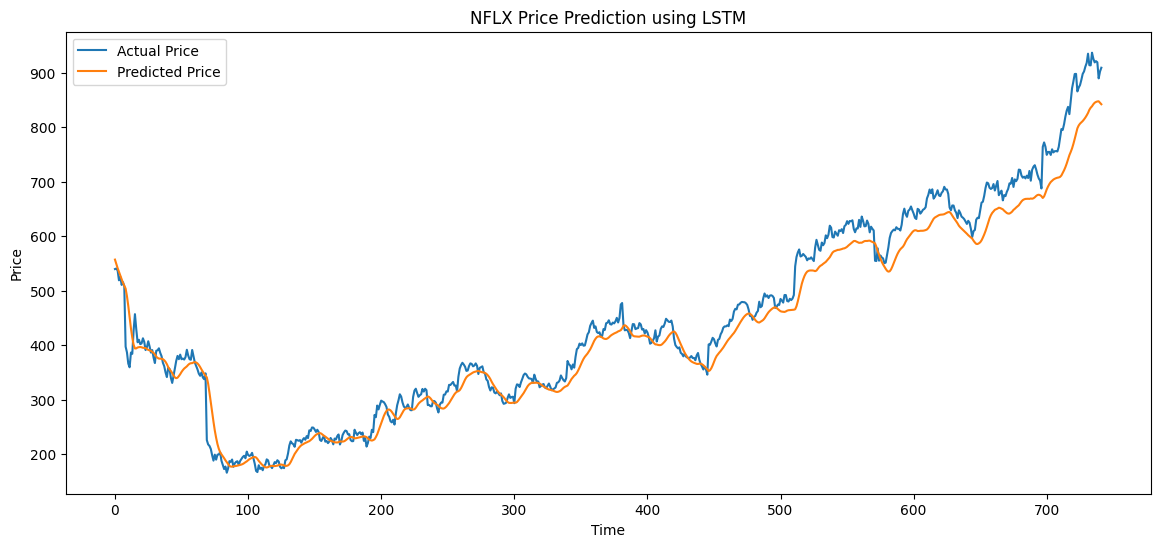

In [63]:
plt.figure(figsize=(14,6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title(f'{symbol} Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.concatenate([predicted, np.zeros((predicted.shape[0], len(features)-1))], axis=1))[:,0]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


NameError: name 'features' is not defined